In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score

1. id: Identificador único para cada registro.
2. title: Título de la canción.
3. artist: Artista o grupo musical.
4. mood: Estado de ánimo asociado con la canción.
5. tempo: Tempo de la canción.
6. genre: Género musical.
7. artist_type: Tipo de artista (por ejemplo, masculino, femenino, grupo).
8. chart_date: Fecha en la que la canción entró en las listas de Billboard.
9. durationSeg: Duración de la canción en segundos.
10. top: Indica si la canción alcanzó el top de las listas (1 para sí, 0 para no).
11. anioNacimiento: Año de nacimiento del artista.



In [ ]:
path="/content/artists_billboard.csv"
data = pd.read_csv(path)
data.head()

,id,title,artist,mood,tempo,genre,artist_type,chart_date,durationSeg,top,anioNacimiento
0,0,Small Town Throwdown,BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...,Brooding,Medium Tempo,Traditional,Male,20140628,191.0,0,1975.0
1,1,Bang Bang,"JESSIE J, ARIANA GRANDE & NICKI MINAJ",Energizing,Medium Tempo,Pop,Female,20140816,368.0,0,1989.0
2,2,Timber,PITBULL featuring KE$HA,Excited,Medium Tempo,Urban,Mixed,20140118,223.0,1,1993.0
3,3,Sweater Weather,THE NEIGHBOURHOOD,Brooding,Medium Tempo,Alternative & Punk,Male,20140104,206.0,0,1989.0
4,4,Automatic,MIRANDA LAMBERT,Yearning,Medium Tempo,Traditional,Female,20140301,232.0,0,0.0


#EDA#

In [ ]:
# Revisando estadísticas descriptivas básicas y la presencia de valores faltantes
summary = data.describe(include='all')
missing_values = data.isnull().sum()

summary, missing_values


(                id title artist        mood         tempo  genre artist_type  \
 count   635.000000   635    635         635           635    635         635   
 unique         NaN   626    423          23             3      9           3   
 top            NaN  Roar  DRAKE  Empowering  Medium Tempo  Urban        Male   
 freq           NaN     2     10          88           517    215         387   
 mean    317.000000   NaN    NaN         NaN           NaN    NaN         NaN   
 std     183.452991   NaN    NaN         NaN           NaN    NaN         NaN   
 min       0.000000   NaN    NaN         NaN           NaN    NaN         NaN   
 25%     158.500000   NaN    NaN         NaN           NaN    NaN         NaN   
 50%     317.000000   NaN    NaN         NaN           NaN    NaN         NaN   
 75%     475.500000   NaN    NaN         NaN           NaN    NaN         NaN   
 max     634.000000   NaN    NaN         NaN           NaN    NaN         NaN   
 
           chart_date  dur

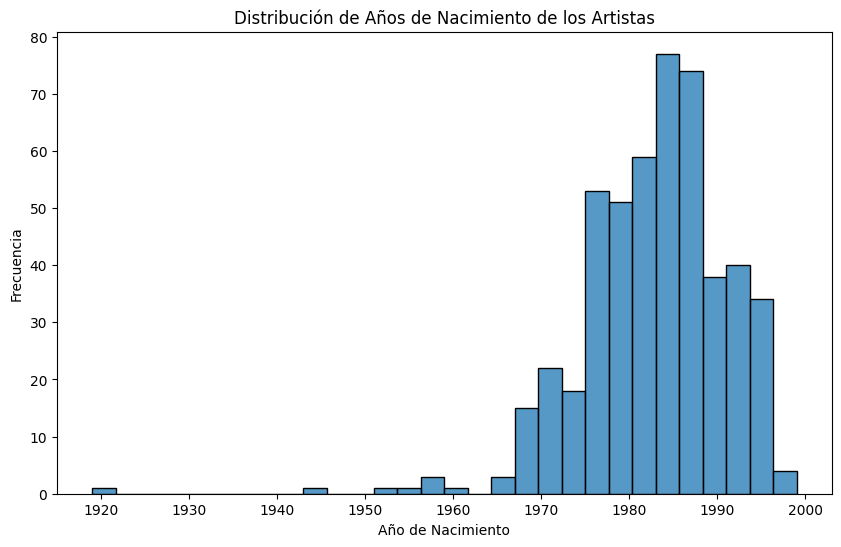

139

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrando los registros con años de nacimiento que parecen ser válidos (mayores a 1900)
valid_birth_years = data[data['anioNacimiento'] > 1900]

# Histograma de los años de nacimiento
plt.figure(figsize=(10, 6))
sns.histplot(valid_birth_years['anioNacimiento'], kde=False, bins=30)
plt.title('Distribución de Años de Nacimiento de los Artistas')
plt.xlabel('Año de Nacimiento')
plt.ylabel('Frecuencia')
plt.show()

# Contando los valores que son 0 o menores a 1900
invalid_birth_years_count = data[data['anioNacimiento'] <= 1900]['anioNacimiento'].count()
invalid_birth_years_count


In [ ]:
# Filtrando el conjunto de datos para incluir solo artistas nacidos a partir de 1950
filtered_data = data[data['anioNacimiento'] >= 1950]

# Verificando las dimensiones del conjunto de datos filtrado y mostrando las primeras filas
filtered_data_shape = filtered_data.shape
filtered_data_head = filtered_data.head()

filtered_data_shape, filtered_data_head


((494, 11),
    id                  title  \
 0   0   Small Town Throwdown   
 1   1              Bang Bang   
 2   2                 Timber   
 3   3        Sweater Weather   
 5   5  Where Is At (Yep Yep)   
 
                                               artist        mood  \
 0  BRANTLEY GILBERT featuring JUSTIN MOORE & THOM...    Brooding   
 1              JESSIE J, ARIANA GRANDE & NICKI MINAJ  Energizing   
 2                            PITBULL featuring KE$HA     Excited   
 3                                  THE NEIGHBOURHOOD    Brooding   
 5                                       DUSTIN LYNCH      Upbeat   
 
           tempo               genre artist_type  chart_date  durationSeg  top  \
 0  Medium Tempo         Traditional        Male    20140628        191.0    0   
 1  Medium Tempo                 Pop      Female    20140816        368.0    0   
 2  Medium Tempo               Urban       Mixed    20140118        223.0    1   
 3  Medium Tempo  Alternative & Punk        

Una justificación para eliminar los datos de artistas nacidos antes de 1950 del análisis puede basarse en varios puntos clave relacionados con la relevancia, precisión y contexto del estudio:

* Relevancia Contemporánea: La música y la popularidad de los artistas pueden estar fuertemente influenciadas por tendencias y gustos contemporáneos. Los artistas nacidos después de 1950 tienen más probabilidades de haber estado activos durante períodos más relevantes para las tendencias musicales actuales, lo que hace que su análisis sea más pertinente para entender la música popular moderna.

* Precisión de los Datos: Los datos de años de nacimiento muy antiguos pueden ser menos precisos o confiables. Esto se debe a que la recolección y el registro de datos en décadas pasadas no eran tan rigurosos como en tiempos más recientes. Al limitar el análisis a artistas nacidos después de 1950, se reduce el riesgo de trabajar con datos inexactos o mal registrados.

* Cambio en la Industria Musical: La industria de la música ha experimentado cambios significativos en las últimas décadas, tanto en términos de tecnología como de cultura. Los artistas nacidos después de 1950 están más alineados con la era de la música grabada, la radio, la televisión y, más recientemente, el streaming digital, lo que los hace más representativos de la industria musical tal como la conocemos hoy.

* Datos Atípicos y Anomalías: La presencia de años de nacimiento extremadamente antiguos o incorrectos (como los años 0 o pre-1900) sugiere errores en los datos o entradas atípicas. Eliminar estos datos mejora la calidad general del análisis al centrarse en registros más confiables.

* Enfoque en Generaciones Relevantes: Al centrarse en artistas nacidos después de 1950, el análisis puede enfocarse en generaciones que han sido culturalmente significativas en la música popular reciente, incluyendo los baby boomers, la Generación X y los millennials, que han tenido un impacto considerable en la evolución de la música popular.

En resumen, limitar el análisis a artistas nacidos después de 1950 mejora la relevancia, precisión y coherencia del estudio, asegurando que los hallazgos sean más aplicables al contexto actual de la industria musical.

<ipython-input-7-7cda686f863b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['generation'] = filtered_data['anioNacimiento'].apply(classify_generation)


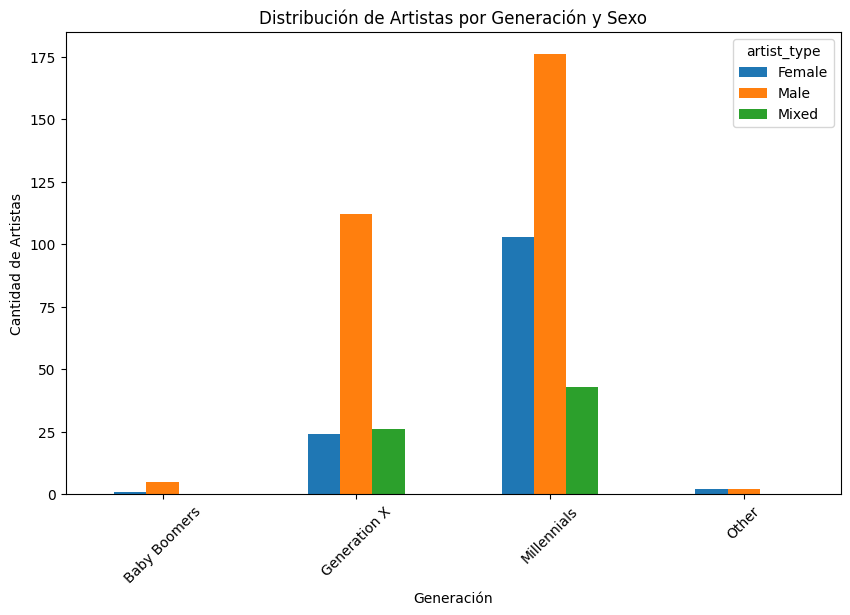

In [ ]:
# Creando una columna para clasificar a los artistas en generaciones
def classify_generation(year):
    if 1950 <= year <= 1964:
        return 'Baby Boomers'
    elif 1965 <= year <= 1980:
        return 'Generation X'
    elif 1981 <= year <= 1996:
        return 'Millennials'
    else:
        return 'Other'

filtered_data['generation'] = filtered_data['anioNacimiento'].apply(classify_generation)

# Conteo de artistas por generación y sexo
generation_sex_count = filtered_data.groupby(['generation', 'artist_type']).size().unstack()

# Gráfico de barras
generation_sex_count.plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de Artistas por Generación y Sexo')
plt.xlabel('Generación')
plt.ylabel('Cantidad de Artistas')
plt.xticks(rotation=45)
plt.show()


Baby Boomers: Normalmente se considera que esta generación abarca a las personas nacidas entre 1946 y 1964. Dado que ya hemos filtrado el conjunto de datos para incluir solo a aquellos nacidos después de 1950, utilizaremos el rango de 1950 a 1964 para los baby boomers en nuestro análisis.

Generación X: Esta generación abarca a los nacidos entre 1965 y 1980.

Millennials (Generación Y): Los millennials son generalmente considerados como aquellos nacidos entre 1981 y 1996.

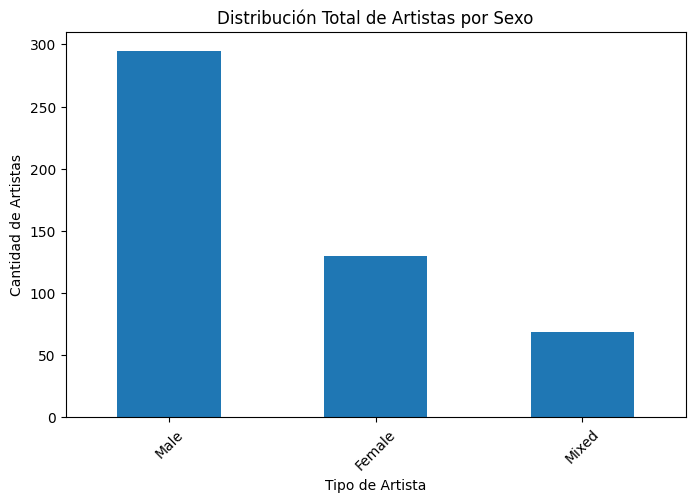

In [ ]:
# Conteo de artistas por sexo
sex_count = filtered_data['artist_type'].value_counts()

# Gráfico de barras para la distribución de artistas por sexo
sex_count.plot(kind='bar', figsize=(8, 5))
plt.title('Distribución Total de Artistas por Sexo')
plt.xlabel('Tipo de Artista')
plt.ylabel('Cantidad de Artistas')
plt.xticks(rotation=45)
plt.show()


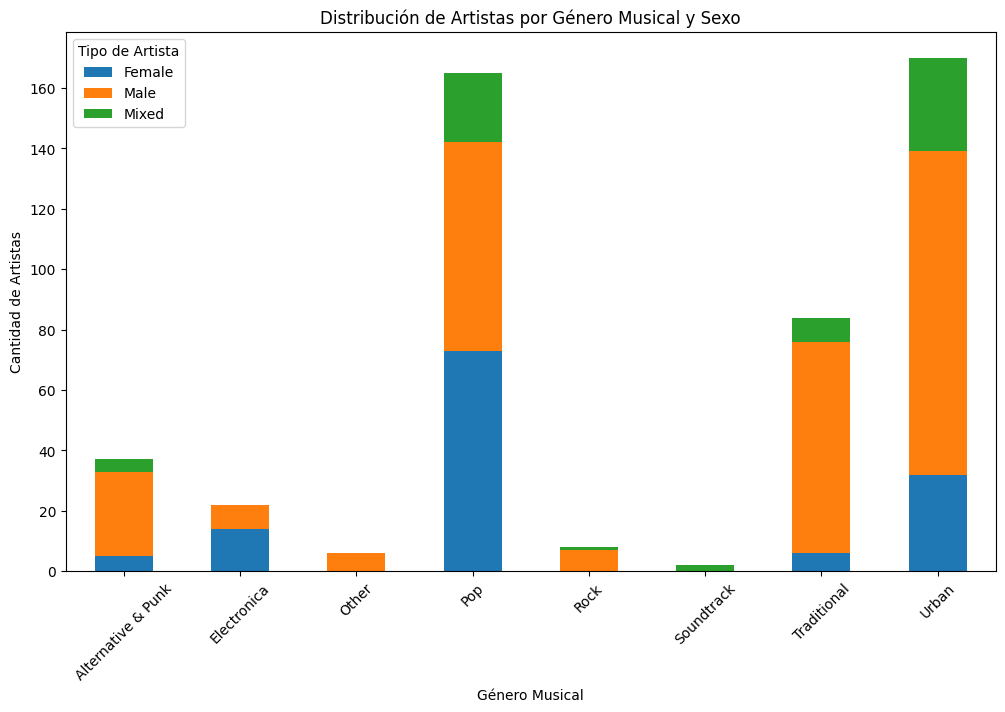

In [ ]:
# Gráfico de barras apilado para la distribución de artistas por sexo y género musical
genre_sex_count = filtered_data.groupby(['genre', 'artist_type']).size().unstack().fillna(0)

genre_sex_count.plot(kind='bar', stacked=True, figsize=(12, 7), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Distribución de Artistas por Género Musical y Sexo')
plt.xlabel('Género Musical')
plt.ylabel('Cantidad de Artistas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Artista')
plt.show()


In [ ]:
# Definiendo colores específicos para cada tipo de artista
custom_colors = ['lightgreen', 'lightpink', 'yellow']

# Gráfico de barras apilado con colores específicos
genre_sex_count_sorted.plot(kind='bar', stacked=True, figsize=(12, 7), color=custom_colors)
plt.title('Distribución de Artistas por Género Musical y Sexo (Orden Descendente)')
plt.xlabel('Género Musical')
plt.ylabel('Cantidad de Artistas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Artista')
plt.show()



NameError: ignored

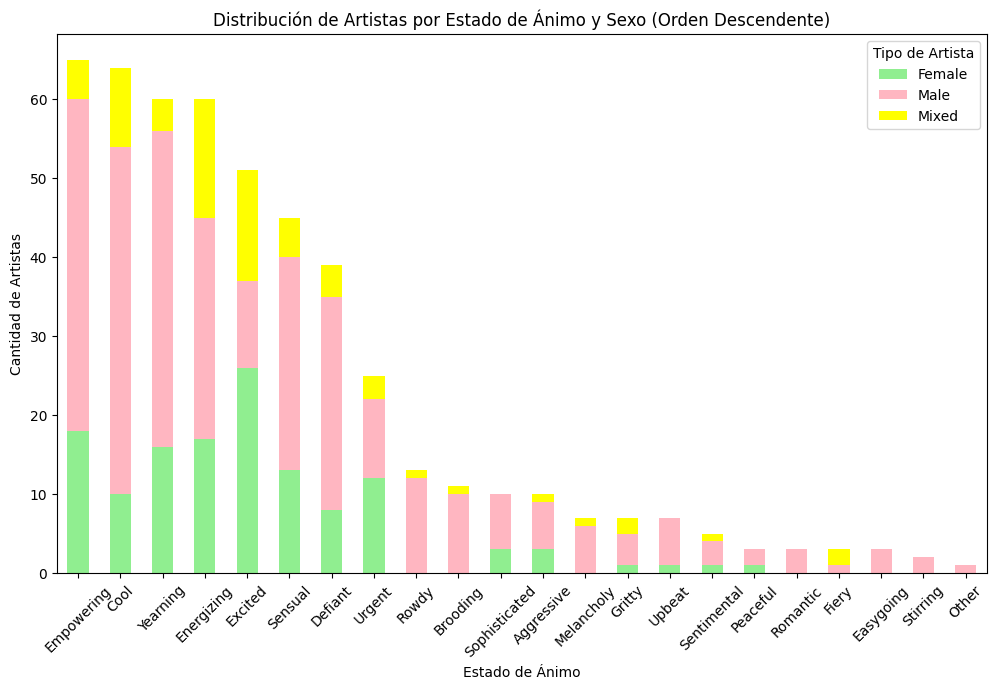

In [ ]:
# Gráfico de barras apilado para la distribución de artistas por estado de ánimo (mood) y sexo
mood_sex_count = filtered_data.groupby(['mood', 'artist_type']).size().unstack().fillna(0)

# Ordenando los estados de ánimo de forma descendente según el total de artistas
mood_sex_count_sorted = mood_sex_count.sum(axis=1).sort_values(ascending=False).index
mood_sex_count_sorted = mood_sex_count.loc[mood_sex_count_sorted]

# Gráfico de barras apilado con colores específicos para cada tipo de artista
mood_sex_count_sorted.plot(kind='bar', stacked=True, figsize=(12, 7), color=custom_colors)
plt.title('Distribución de Artistas por Estado de Ánimo y Sexo (Orden Descendente)')
plt.xlabel('Estado de Ánimo')
plt.ylabel('Cantidad de Artistas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Artista')
plt.show()


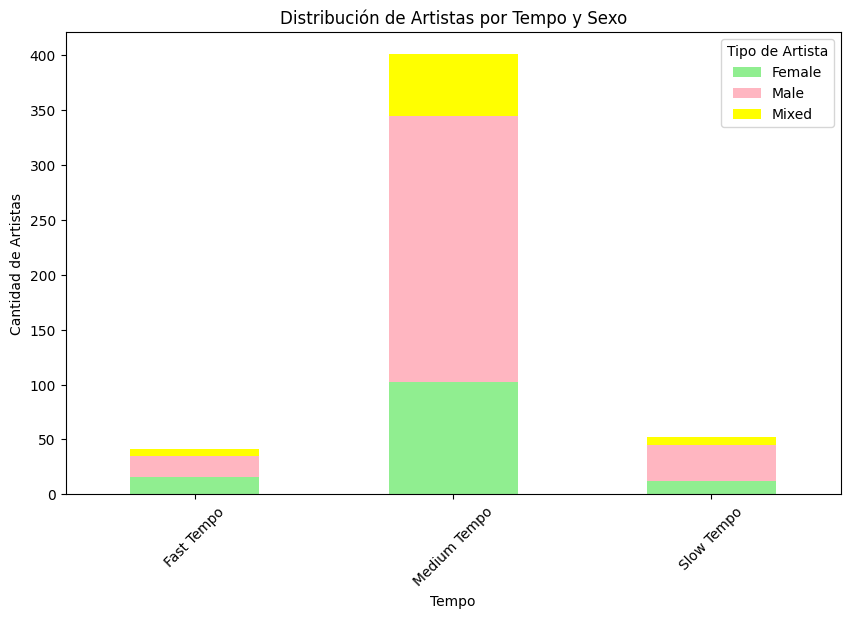

In [ ]:
# Gráfico de barras apilado para la distribución de artistas por tempo y sexo
tempo_sex_count = filtered_data.groupby(['tempo', 'artist_type']).size().unstack().fillna(0)

# Gráfico de barras apilado con colores específicos para cada tipo de artista
tempo_sex_count.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)
plt.title('Distribución de Artistas por Tempo y Sexo')
plt.xlabel('Tempo')
plt.ylabel('Cantidad de Artistas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Artista')
plt.show()


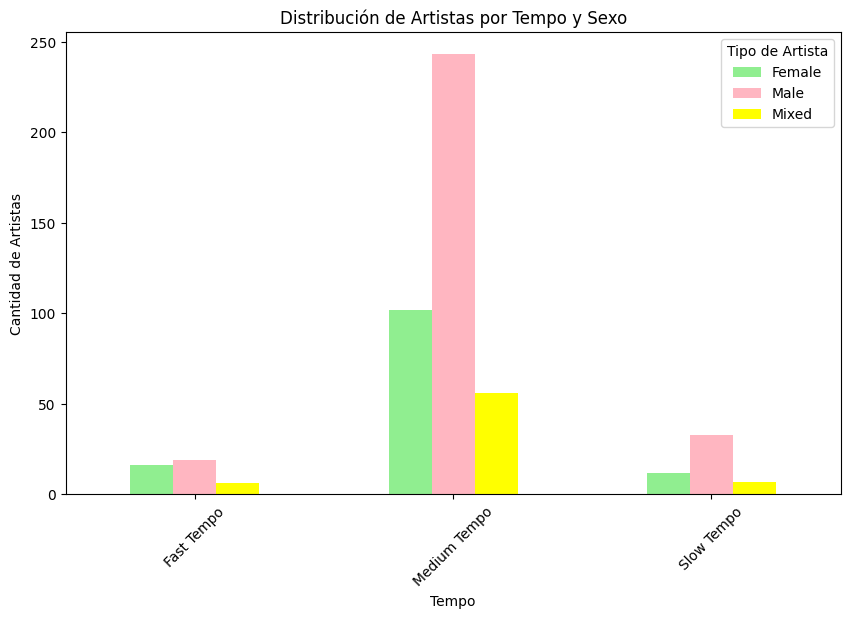

In [ ]:
# Gráfico de barras no apilado para la distribución de artistas por tempo y sexo
tempo_sex_count.plot(kind='bar', stacked=False, figsize=(10, 6), color=custom_colors)
plt.title('Distribución de Artistas por Tempo y Sexo')
plt.xlabel('Tempo')
plt.ylabel('Cantidad de Artistas')
plt.xticks(rotation=45)
plt.legend(title='Tipo de Artista')
plt.show()


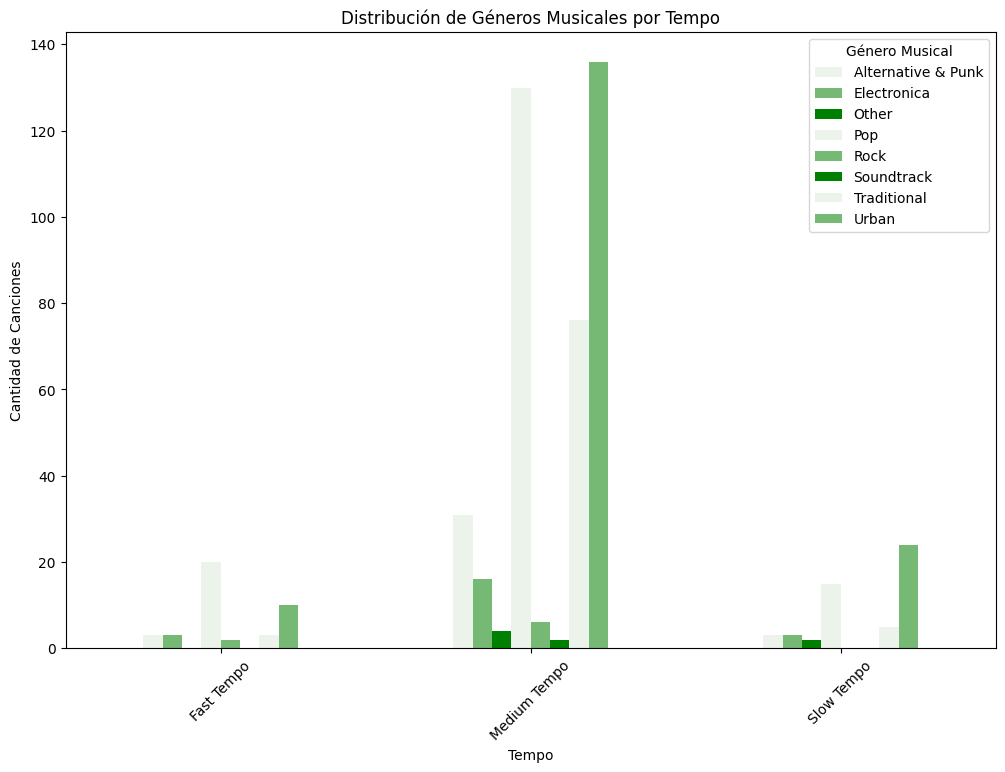

In [ ]:
# Creando una paleta de colores en escala de verdes
green_palette = sns.light_palette("green", n_colors=3)

# Gráfico de barras para la distribución de géneros musicales por tempo
tempo_genre_count = filtered_data.groupby(['tempo', 'genre']).size().unstack().fillna(0)

# Gráfico de barras no apilado con paleta de verdes
tempo_genre_count.plot(kind='bar', stacked=False, figsize=(12, 8), color=green_palette)
plt.title('Distribución de Géneros Musicales por Tempo')
plt.xlabel('Tempo')
plt.ylabel('Cantidad de Canciones')
plt.xticks(rotation=45)
plt.legend(title='Género Musical')
plt.show()


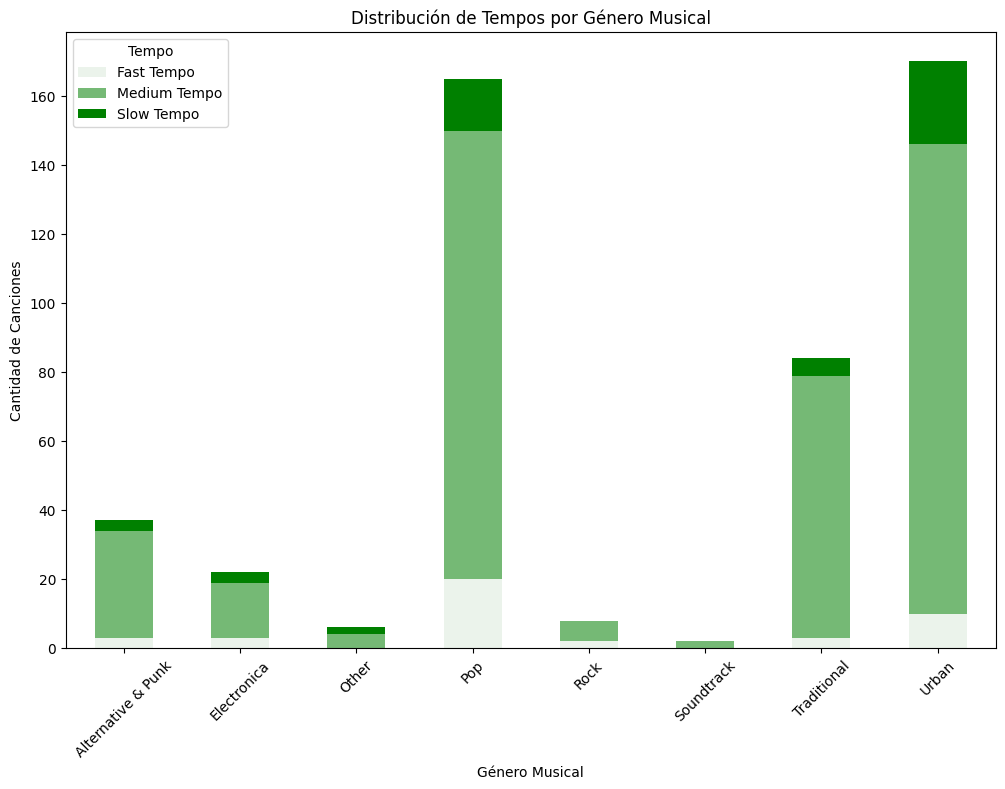

In [ ]:
# Gráfico de barras apilado para la distribución de tempos por género musical
genre_tempo_count = filtered_data.groupby(['genre', 'tempo']).size().unstack().fillna(0)

# Gráfico de barras apilado con paleta de verdes
genre_tempo_count.plot(kind='bar', stacked=True, figsize=(12, 8), color=green_palette)
plt.title('Distribución de Tempos por Género Musical')
plt.xlabel('Género Musical')
plt.ylabel('Cantidad de Canciones')
plt.xticks(rotation=45)
plt.legend(title='Tempo')
plt.show()


In [ ]:
import statsmodels.api as sm

# Preparar los datos para el modelo GLM
X_glm = final_data.drop('top', axis=1)
y_glm = final_data['top']

# Añadir una constante a los predictores, necesario para modelos en statsmodels
X_glm_const = sm.add_constant(X_glm)

# Crear y entrenar el modelo GLM
glm_model = sm.GLM(y_glm, X_glm_const, family=sm.families.Binomial())
glm_results = glm_model.fit()

# Resumen del modelo
glm_summary = glm_results.summary()
glm_summary


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: divide by zero encountered in log
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +
/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/families/family.py:1056: RuntimeWarning: invalid value encountered in multiply
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    top   No. Observations:                  635
Model:                            GLM   Df Residuals:                      598
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 04 Dec 2023   Deviance:                       14184.
Time:                        20:38:06   Pearson chi2:                 6.94e+17
No. Iterations:                    72   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -2.163e+15   5.58e+06  -3.87e+08      0.000   -2.16e+15   -2.16e+15
durationSeg              -7.937e+10   4335.460  -1.83e+07      0.000   -7.94e+10   -7.94e+10
anioNacimiento            7.772e+11   3460.556   2.25e+08      0.000    7.77e+11    7.77e+11
mood_Aggressive            1.15e+15   2.06e+07   5.57e+07      0.000    1.15e+15    1.15e+15
mood_Brooding             2.171e+15   1.87e+07   1.16e+08      0.000    2.17e+15    2.17e+15
mood_Cool                -1.363e+14   9.92e+06  -1.37e+07      0.000   -1.36e+14   -1.36e+14
mood_Defiant              1.134e+15   1.04e+07   1.09e+08      0.000    1.13e+15    1.13e+15
mood_Easygoing           -2.786e+15   3.31e+07  -8.41e+07      0.000   -2.79e+15   -2.79e+15
mood_Empowering           8.391e+14   9.56e+06   8.78e+07      0.000    8.39e+14    8.39e+14
mood_Energizing           2.421e+15      1e+07   2.41e+08      0.000    2.42e+15    2.42e+15
mood_Excited               5.46e+14   1.08e+07   5.08e+07      0.000    5.46e+14    5.46e+14
mood_Fiery                1.712e+15   2.86e+07   5.99e+07      0.000    1.71e+15    1.71e+15
mood_Gritty               2.172e+15   2.27e+07   9.55e+07      0.000    2.17e+15    2.17e+15
mood_Lively              -6.672e+14   4.89e+07  -1.37e+07      0.000   -6.67e+14   -6.67e+14
mood_Melancholy          -1.998e+15   2.15e+07  -9.27e+07      0.000      -2e+15      -2e+15
mood_Other               -3.574e+15   6.52e+07  -5.48e+07      0.000   -3.57e+15   -3.57e+15
mood_Peaceful            -2.497e+15   3.37e+07  -7.41e+07      0.000    -2.5e+15    -2.5e+15
mood_Romantic             -1.95e+15   2.57e+07  -7.58e+07      0.000   -1.95e+15   -1.95e+15
mood_Rowdy                1.948e+15    1.8e+07   1.08e+08      0.000    1.95e+15    1.95e+15
mood_Sensual              1.254e+15   1.09e+07   1.15e+08      0.000    1.25e+15    1.25e+15
mood_Sentimental         -2.596e+15   2.68e+07  -9.69e+07      0.000    -2.6e+15    -2.6e+15
mood_Sophisticated        1.211e+15   1.79e+07   6.77e+07      0.000    1.21e+15    1.21e+15
mood_Stirring            -3.299e+15   4.61e+07  -7.15e+07      0.000    -3.3e+15    -3.3e+15
mood_Upbeat              -1.923e+15   2.07e+07  -9.28e+07      0.000   -1.92e+15   -1.92e+15
mood_Urgent                1.79e+15   1.37e+07   1.31e+08      0.000    1.79e+15    1.79e+15
mood_Yearning             9.146e+14   1.04e+07   8.83e+07      0.000    9.15e+14    9.15e+14
tempo_Fast Tempo         -7.274e+14   8.41e+06  -8.65e+07      0.000   -7.27e+14   -7.27e+14
tempo_Medium Tempo       -8.965e+14    4.8e+06  -1.87e+08      0.000   -8.96e+14   -8.96e+14
tempo_Slow Tempo         -5.395e+14   8.16e+06  -6.61e+07      0.000    -5.4e+14    -5.4e+14
genre_Alternative & Punk  3.876e+14   1.09e+07   3.56e+07      0.000    3.88e+14    3.88e+14
genre_Electron

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcular VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_glm_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_glm_const.values, i) for i in range(X_glm_const.shape[1])]

# Filtrar variables con VIF alto (usualmente un umbral de 5 o 10 se considera indicativo de multicolinealidad)
vif_data_high = vif_data[vif_data['VIF'] > 10]

vif_data_high


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Variable,VIF
3,mood_Aggressive,inf
4,mood_Brooding,inf
5,mood_Cool,inf
6,mood_Defiant,inf
7,mood_Easygoing,inf
8,mood_Empowering,inf
9,mood_Energizing,inf
10,mood_Excited,inf
11,mood_Fiery,inf
12,mood_Gritty,inf


In [ ]:
# Eliminar las variables categóricas con alto VIF
variables_to_remove = vif_data_high['Variable']
X_glm_reduced = X_glm_const.drop(columns=variables_to_remove)

# Crear y entrenar el modelo GLM con el conjunto de datos reducido
glm_model_reduced = sm.GLM(y_glm, X_glm_reduced, family=sm.families.Binomial())
glm_results_reduced = glm_model_reduced.fit()

# Resumen del modelo reducido
glm_summary_reduced = glm_results_reduced.summary()
glm_summary_reduced


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    top   No. Observations:                  635
Model:                            GLM   Df Residuals:                      632
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -300.46
Date:                Mon, 04 Dec 2023   Deviance:                       600.92
Time:                        20:56:21   Pearson chi2:                     618.
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1065
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.7603      0.962     -4.946      0.000      -6.647      -2.874
durationSeg       -0.0003      0.000     -1.175      0.240      -0.001       0.000
anioNacimiento     0.0020      0.000      4.047      0.000       0.001       0.003
==================================================================================
"""

In [ ]:
# Eliminar una categoría de cada conjunto de variables One-Hot para reducir la multicolinealidad
categories_to_remove = ['mood_Aggressive', 'tempo_Fast Tempo', 'genre_Alternative & Punk', 'artist_type_Female']
X_glm_reduced_balanced = X_glm_const.drop(columns=categories_to_remove)

# Crear y entrenar el modelo GLM con el conjunto de datos reducido pero más balanceado
glm_model_reduced_balanced = sm.GLM(y_glm, X_glm_reduced_balanced, family=sm.families.Binomial())
glm_results_reduced_balanced = glm_model_reduced_balanced.fit()

# Resumen del modelo reducido pero más balanceado
glm_summary_reduced_balanced = glm_results_reduced_balanced.summary()
glm_summary_reduced_balanced


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    top   No. Observations:                  635
Model:                            GLM   Df Residuals:                      598
Model Family:                Binomial   Df Model:                           36
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -234.44
Date:                Mon, 04 Dec 2023   Deviance:                       468.88
Time:                        21:01:23   Pearson chi2:                     497.
No. Iterations:                    23   Pseudo R-squ. (CS):             0.2743
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -5.4333      1.380     -3.936      0.000      -8.139      -2.728
durationSeg           -0.0002      0.000     -0.480      0.631      -0.001       0.000
anioNacimiento         0.0019      0.000      3.846      0.000       0.001       0.003
mood_Brooding          0.8412      1.105      0.761      0.446      -1.324       3.007
mood_Cool              0.2931      0.794      0.369      0.712      -1.263       1.849
mood_Defiant          -1.1835      0.890     -1.330      0.184      -2.928       0.561
mood_Easygoing       -23.4551   6.12e+04     -0.000      1.000    -1.2e+05     1.2e+05
mood_Empowering       -0.3112      0.845     -0.368      0.713      -1.968       1.346
mood_Energizing        0.8882      0.783      1.134      0.257      -0.647       2.424
mood_Excited           0.1251      0.803      0.156      0.876      -1.448       1.698
mood_Fiery             0.3612      1.610      0.224      0.822      -2.794       3.516
mood_Gritty            0.9225      1.328      0.694      0.487      -1.681       3.526
mood_Lively          -18.5525    8.2e+04     -0.000      1.000   -1.61e+05    1.61e+05
mood_Melancholy      -23.2843   3.57e+04     -0.001      0.999      -7e+04       7e+04
mood_Other           -24.2232   1.31e+05     -0.000      1.000   -2.57e+05    2.57e+05
mood_Peaceful        -23.6180   5.78e+04     -0.000      1.000   -1.13e+05    1.13e+05
mood_Romantic        -21.9347   4.08e+04     -0.001      1.000   -7.99e+04    7.99e+04
mood_Rowdy             0.9023      1.118      0.807      0.420      -1.289       3.094
mood_Sensual          -0.0679      0.821     -0.083      0.934      -1.677       1.541
mood_Sentimental     -22.5851   4.47e+04     -0.001      1.000   -8.77e+04    8.77e+04
mood_Sophisticated     0.1505      1.016      0.148      0.882      -1.840       2.141
mood_Stirring        -23.5812   9.16e+04     -0.000      1.000   -1.79e+05    1.79e+05
mood_Upbeat          -19.9403   3.56e+04     -0.001      1.000   -6.97e+04    6.97e+04
mood_Urgent            0.1924      0.872      0.221      0.825      -1.517       1.902
mood_Yearning         -0.6640      0.887     -0.748      0.454      -2.403       1.075
tempo_Medium Tempo     0.3916      0.433      0.904      0.366      -0.458       1.241
tempo_Slow Tempo       0.7303      0.597      1.224      0.221      -0.439       1.899
genre_Electronica     -1.0021      0.941     -1.065      0.287      -2.846       0.841
genre_Jazz           -18.9847   9.24e+04     -0.000      1.000   -1.81e+05    1.81e+05
genre_Other            1.1913      1.077      1.106      0.269      -0.920       3.303
genre_Pop              1.0486      0.573      1.832      0.067      -0.073       2.171
genre_Rock           -21.9279   3.19e+04     -0.001      0.999   -6.26e+04    6.25e+04
genre_Soundtrack     -21.7212   4.81e+

##Variables Significativas

* anioNacimiento (Año de nacimiento):

Coeficiente: 0.0019
Interpretación: Por cada año adicional en el año de nacimiento (lo que indica un artista más joven), la probabilidad logarítmica de que la canción sea un "top hit" aumenta en 0.0019, manteniendo constantes las demás variables.
* genre_Traditional (Género Tradicional):

Coeficiente: -2.3265
Interpretación: Las canciones del género tradicional tienen una probabilidad logarítmica menor de ser un "top hit" en comparación con las canciones de otros géneros (no incluidos en el modelo), manteniendo constantes las demás variables.
* genre_Urban (Género Urbano):

Coeficiente: 1.3282
Interpretación: Las canciones del género urbano tienen una mayor probabilidad logarítmica de ser un "top hit" en comparación con las canciones de otros géneros (no incluidos en el modelo), manteniendo constantes las demás variables.
* artist_type_Male (Artista Masculino):

Coeficiente: 0.6621
Interpretación: Las canciones interpretadas por artistas masculinos tienen una mayor probabilidad logarítmica de ser un "top hit" en comparación con las interpretadas por artistas no masculinos (femeninos o mixtos), manteniendo constantes las demás variables.

##Variables No Significativas
Las demás variables, incluyendo "durationSeg" (duración de la canción) y varias categorías de "mood" (estado de ánimo), "tempo" y otros géneros, no son estadísticamente significativas en este modelo. Esto significa que, con los datos actuales y bajo este modelo, no se puede afirmar con confianza que estas variables tengan un impacto significativo en la probabilidad de que una canción sea un "top hit".

## Consideraciones Adicionales
Valores extremadamente grandes o pequeños (por ejemplo, en algunas categorías de "mood"): Estos coeficientes pueden ser resultado de la escasez de datos para esas categorías específicas, lo que puede llevar a estimaciones inestables.
Pseudo R-squared: Con un valor de 0.2743, este modelo explica una cantidad razonable de variabilidad en los datos, pero aún hay espacio para mejoras, posiblemente considerando otras variables o interacciones no incluidas en este modelo.
Número de Iteraciones: El modelo necesitó 23 iteraciones para converger, lo cual es normal en la regresión logística.